In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, iqr, median_abs_deviation, shapiro, kstest, normaltest, probplot, norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
state = pd.read_csv('state.csv').sort_values(by=['Population']) # read document

state.head(5)

,State,Population,Murder.Rate,Abbreviation
49,Wyoming,563626,2.7,WY
44,Vermont,625741,1.6,VT
33,North Dakota,672591,3.0,ND
1,Alaska,710231,5.6,AK
40,South Dakota,814180,2.3,SD


In [3]:
np.mean(state['Population']) # mean

6162876.3

In [4]:
trim_mean(state['Population'], 0.1) # trimmed mean

4783697.125

In [5]:
np.median(state['Population']) # median

4436369.5

In [6]:
np.average(state['Murder.Rate'], weights = state['Population'] ) # weighted mean

4.445833981123393

In [7]:
# function that return the weighted median.
def weighted_median(value, weight) -> float:
    df = pd.DataFrame(data=[value,weight]).T
    df = df.sort_values(by=df.columns[0]).reset_index(drop=True)
    value = df.iloc[:,0]
    weight = df.iloc[:,1]

    wCeil = 0
    iterator = 0
    half = sum(weight)/2

    while wCeil < half:
        wCeil += weight[iterator]
        iterator+=1

    wFloor = wCeil - weight[iterator-1]
    vCeil = value[iterator]
    vFloor = value[iterator-2]

    return vFloor + ((half - wFloor) / (wCeil - wFloor)) * (vCeil - vFloor)

In [8]:
weighted_median(state['Murder.Rate'], state['Population']) # weighted median

4.421634381114027

In [9]:
np.std(state['Population']) # standard desviation

6779407.114632265

In [10]:
iqr(state['Population']) # interquartile range

4847308.0

In [11]:
# median absolute deviation
def mad(data, axis=None):
    return np.median(np.absolute(data - np.median(data, axis)), axis)

In [12]:
# median absolute desviation
mad(state['Population'])

2596702.0

In [13]:
median_abs_deviation(state['Population']) * 1.4826 # corrected  median absolute deviation 

# It's importante to note that the corrected median absolute
# deviation does not approach the standard desviation, which
# can signals that the correction is not adequate.

3849870.3852

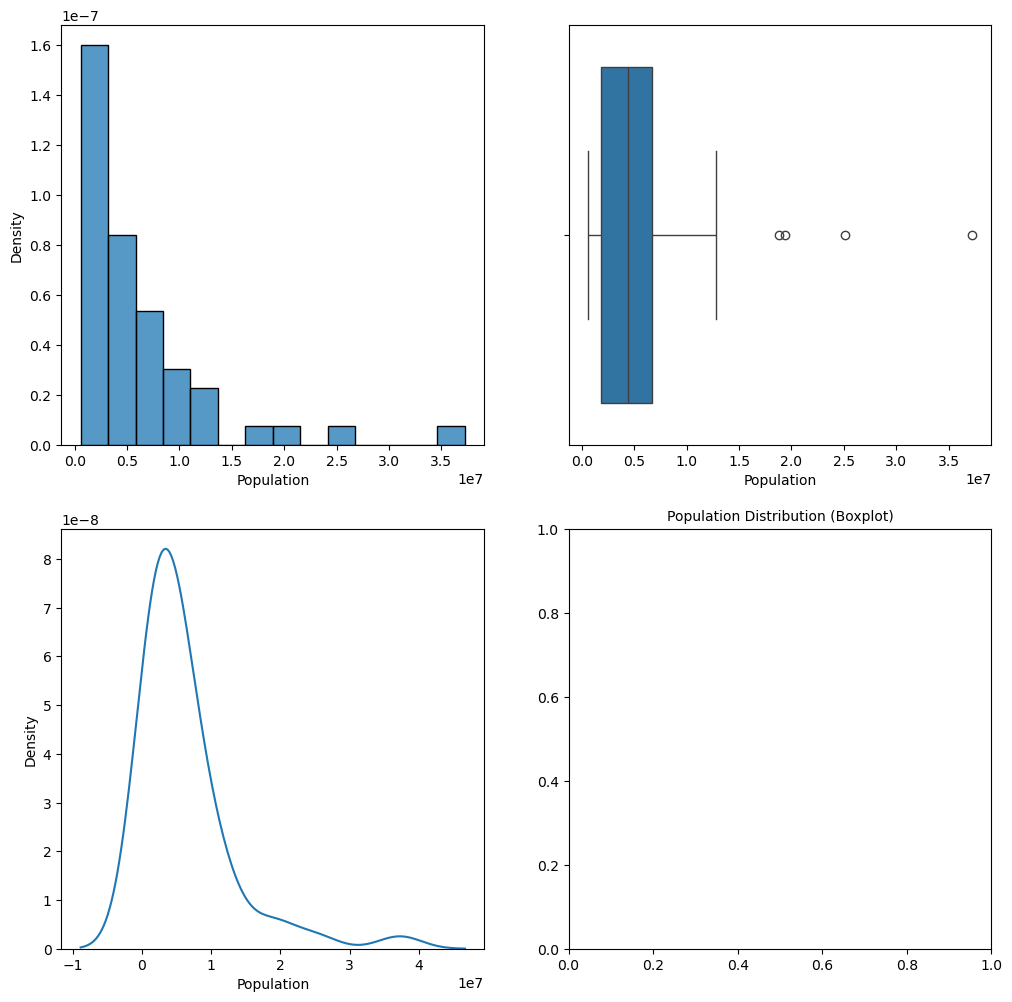

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=state, x='Population', stat='density', ax=axes[0, 0])
plt.title('Population Distribution (Histogram)', fontsize=10, loc='center')

sns.boxplot(data=state, x='Population', ax=axes[0, 1])
plt.title('Population Distribution (Boxplot)', fontsize=10, loc='center')

sns.kdeplot(state, x='Population',ax=axes[1, 0])

plt.show()

#The distribution os the population does not appear to
#correspond to rhe nomal distribution

In [15]:
stat, p = shapiro(state['Population'])
print(f"Shapiro-Wilk Test: Estatística={stat:.4f}, p={p:.4f}")

# Teste de Kolmogorov-Smirnov
stat, p = kstest(state['Population'], 'norm')
print(f"Kolmogorov-Smirnov Test: Estatística={stat:.4f}, p={p:.4f}")

# Teste de D’Agostino (normaltest)
stat, p = normaltest(state['Population'])
print(f"D’Agostino’s K-squared Test: Estatística={stat:.4f}, p={p:.4f}")


# Test interpretation
# if the p-value is greater then 0.05, we do not reject H0, indicating 
# that the data can be considered normal. 

# else, we reject H0

Shapiro-Wilk Test: Estatística=0.7192, p=0.0000
Kolmogorov-Smirnov Test: Estatística=1.0000, p=0.0000
D’Agostino’s K-squared Test: Estatística=47.0611, p=0.0000


In [16]:
quantiles = np.quantile(state['Murder.Rate'],q=[0.05, 0.25, 0.5, 0.75, 0.95])
percentiles = ['5%','25%','50%','75%','95%']

df = pd.DataFrame(quantiles.reshape(1, -1), columns=percentiles)

df

,5%,25%,50%,75%,95%
0,1.6,2.425,4.0,5.55,6.51


In [17]:
dfState = state
num_bins = 11

# Criando os intervalos
bins = np.linspace(state['Population'].min(), state['Population'].max(), num_bins)

pop_freq = pd.cut(state['Population'], bins, include_lowest=True)

dfState['Population'] = pop_freq

In [18]:
dfState.groupby('Population').agg({'State': 'count' ,'Abbreviation': list})

C:\Users\alpaula\AppData\Local\Temp\ipykernel_8424\2983702753.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfState.groupby('Population').agg({'State': 'count' ,'Abbreviation': list})


,State,Abbreviation
Population,,
"(563625.999, 4232659.0]",24,"[WY, VT, ND, AK, SD, DE, MT, RI, NH, ME, HI, I..."
"(4232659.0, 7901692.0]",14,"[KY, LA, SC, AL, CO, MN, WI, MD, MO, TN, AZ, I..."
"(7901692.0, 11570725.0]",6,"[VA, NJ, NC, GA, MI, OH]"
"(11570725.0, 15239758.0]",2,"[PA, IL]"
"(15239758.0, 18908791.0]",1,[FL]
"(18908791.0, 22577824.0]",1,[NY]
"(22577824.0, 26246857.0]",1,[TX]
"(26246857.0, 29915890.0]",0,[]
"(29915890.0, 33584923.0]",0,[]


<Axes: xlabel='Murder.Rate', ylabel='Density'>

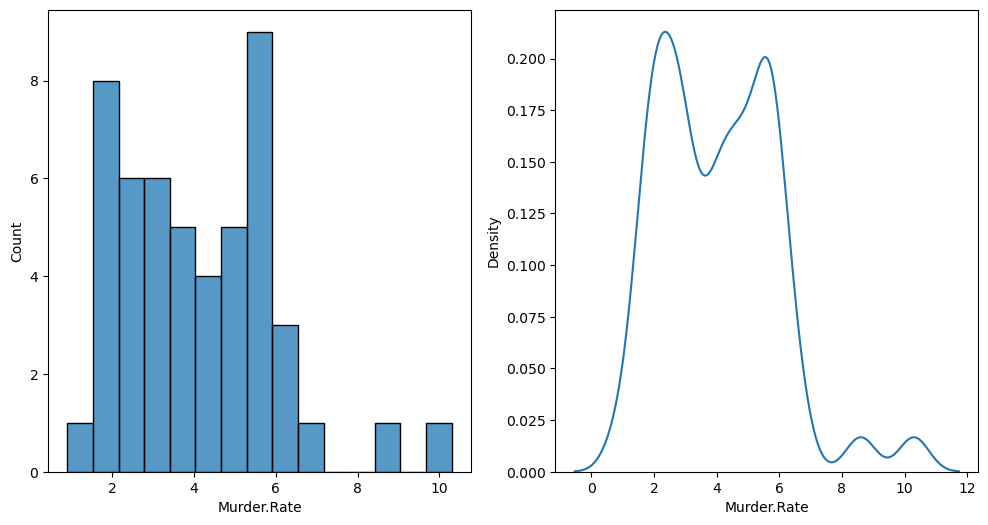

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(state['Murder.Rate'], bins=15, ax=axes[0])

sns.kdeplot(state['Murder.Rate'], ax=axes[1], bw_method=0.25)

In [40]:
mean = 6
variance = 0.25

normal = norm(loc=mean, scale=variance)

normal.pdf(0)

1.337085776717783e-125

In [58]:
def normal(x, h,array):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

In [61]:
np.exp(-0.5 * u**2)

3.726653172078671e-06

In [55]:
state['Murder.Rate'].values

array([ 2.7,  1.6,  3. ,  5.6,  2.3,  5.8,  3.6,  2.4,  0.9,  1.6,  1.8,
        2. ,  2.9,  4. ,  4.8,  6. ,  2.3,  3.1,  5.6,  8.6,  1.9,  2.4,
        4.5,  2. ,  3.6, 10.3,  6.4,  5.7,  2.8,  1.6,  2.9,  6.1,  6.6,
        5.7,  4.7,  5. ,  2. ,  2.5,  4.1,  3.9,  5.1,  5.7,  5.4,  4. ,
        4.8,  5.3,  5.8,  3.1,  4.4,  4.4])

In [64]:
x = 2  # Ponto em que o KDE será calculado
h = 0.25  # Largura de banda

# Função Kernel Gaussiano
def kernel_gaussiano(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

In [68]:
u = (x - state['Murder.Rate']) / h
n = len(state['Murder.Rate'])

kernels = kernel_gaussiano(u)

np.sum(k)

In [ ]:
# Calculando KDE para x=2
n = len(dados)
u = (x - dados) / h  # Distâncias normalizadas
kernels = kernel_gaussiano(u)
kde_x = np.sum(kernels) / (n * h)  # Estimativa de densidade

kde_x